### Frequencies 

This juypyter notebook contains code for calculating:
* Yearly Frequency of unique companies mentioned in DNA articles
* Top 20 total companies mentioned in DNA
* Top 20 publishers mentioned in  DNA 

In [1]:
import gzip
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
import matplotlib.colors
from collections import Counter
from itertools import chain
from datetime import datetime as dt
from nltk import FreqDist
#nltk.download('punkt')
import xlrd

#### Reading in the DNA data

In [48]:
dna = pd.read_json('../data/original/DNA_DATA_FULL.gz', compression='gzip')
#dictionary = pd.read_csv("../data/original/companies.csv") 

#### Converting datetime string to date 

In [49]:
date = [dt.fromtimestamp(dates/1000).strftime('%Y-%m-%d %H:%M:%S') for dates in dna['publication_date']]
pd.to_datetime(date)
dna['year'] = pd.DatetimeIndex(date).year

In [5]:
dna.shape

(1942855, 36)

#### Reading in the subsets of the DNA data for each year

In [5]:
dna_13 = pd.read_csv("../data/working/DNA_2013.csv")
dna_14 = pd.read_csv("../data/working/DNA_2014.csv")
dna_15 = pd.read_csv("../data/working/DNA_2015.csv")
dna_16 = pd.read_csv("../data/working/DNA_2016.csv")
dna_17 = pd.read_csv("../data/working/DNA_2017.csv")
dna_18 = pd.read_csv("../data/working/DNA_2018.csv")

##### Getting rid of multiple mentions of same company in an article

In [50]:
dna['non_duplicates'] = [set(code) for code in dna['company_codes'].str.split(",")] #creates an empty set, goes through each row in company_codes and splits the string in each row by the comma adds each company code and adds company code to set 
dna['non_duplicates'] = [list(code) for code in dna['non_duplicates']] #creates a list object for the entries in the set for each row
dna['non_duplicates'] = [','.join(code) for code in dna['non_duplicates']] #joins the objects in the list with commas
dna['non_duplicates'] = dna['non_duplicates'].str[1:] #removes the first comma in the company_codes in each row
dna[['company_codes', 'non_duplicates']]

,company_codes,non_duplicates
0,",toamsi,toamsi,tosmsc,tosmsc,tshba,tshba,tshba,","toamsi,tosmsc,tshba"
1,",irevs,irevs,irevs,",irevs
2,",euruno,",euruno
3,",retrac,nyse,nyse,retrac,retrac,seexc,","nyse,seexc,retrac"
4,",brstmy,brstmy,brstmy,",brstmy
...,...,...
1942850,",egalcu,egalcu,egalcu,seexc,","seexc,egalcu"
1942851,",endoph,schplo,endoph,endoph,jnsspi,jnsspi,jon...","jnsspi,jonjon,endoph,seexc,schplo"
1942852,",amchso,",amchso
1942853,",grnlft,kalamc,stry,stry,stry,","kalamc,stry,grnlft"


#### How many companies are mentioned in DNA data each year

In [71]:
company_per_year = dna.groupby(['year'], as_index=False)['non_duplicates'].count()
company_per_year.rename(columns = {'non_duplicates':"number_of_companies"}, inplace=True)
company_per_year

,year,number_of_companies
0,2012,409
1,2013,364991
2,2014,364853
3,2015,329372
4,2016,289597
5,2017,295703
6,2018,297930


### Creating Top 20 Individual Companies Histogram

In [20]:
code = dna['company_codes'].str.lower().str.cat(sep=' ') #removes the commas and convert the string into lower case
words = nltk.tokenize.word_tokenize(code) #creates token from each part of the string, so that we can get the count of each individual companies and not multiple companies together
word_dist = nltk.FreqDist(words) #gives a frequency distribution of each token generated
#print (word_dist)
rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Company_code', 'Frequency']) #gives a dataframe that contains individual company code and how many times they appear in the dataset
rslt = rslt[rslt.Company_code !=','] #remove the comma from the code list
rslt

,Company_code,Frequency
1,seexc,581929
2,usfda,532663
3,pfiz,147905
4,nasdaq,146605
5,jonjon,94539
6,sndoz,81878
7,brstmy,81658
8,lilye,78026
9,glxo,75065
10,medinc,74637


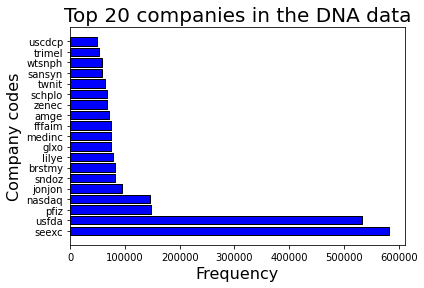

In [22]:
#pos = np.arange(len(rslt.code))
plt.barh(rslt.Company_code,rslt.Frequency,color='blue',edgecolor='black')
plt.yticks(rslt.Company_code)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Company codes', fontsize=16)
plt.title('Top 20 companies in the DNA data',fontsize=20)
plt.show()

### Top 20 Publishers in DNA data

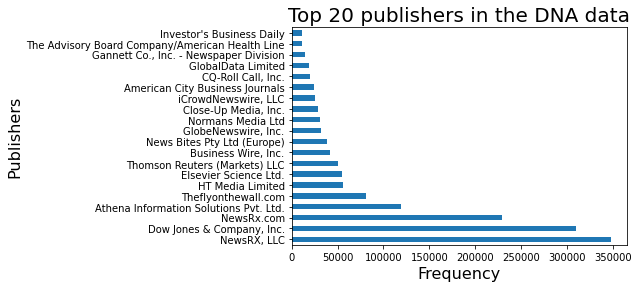

In [35]:
dna['publisher_name'].value_counts()[:20].plot(kind='barh')
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Publishers', fontsize=16)
plt.title('Top 20 publishers in the DNA data',fontsize=20)
plt.show()

##### Number of unique publishers in the dataset and their frequencies

In [37]:
p = pd.value_counts(dna.publisher_name)
publisher = pd.Series({'nunique': len(p), 'unique values': p.index.tolist()})
p.append(publisher)

NewsRX, LLC                                                                          347341
Dow Jones & Company, Inc.                                                            309754
NewsRx.com                                                                           228707
Athena Information Solutions Pvt. Ltd.                                               118669
Theflyonthewall.com                                                                   81326
                                                                ...                        
Estates Gazette Ltd                                                                       1
Agencia de Informaçao de Moçambique                                                       1
Colombia Reports                                                                          1
nunique                                                                                1426
unique values                             [NewsRX, LLC, Dow Jones & Company, Inc

#### Number of articles published by each publisher

In [5]:
article_by_publisher = dna.groupby(['publisher_name'])['an'].count().sort_values(ascending=False)
article_by_publisher

publisher_name
NewsRX, LLC                                  347341
Dow Jones & Company, Inc.                    309754
NewsRx.com                                   228707
Athena Information Solutions Pvt. Ltd.       118669
Theflyonthewall.com                           81326
                                              ...  
Asianet Satellite Communications Pvt Ltd.         1
Valor Economico S.A.                              1
Sourcing Partners                                 1
LLC Georgia Media Incorporated                    1
Le Monde Interactif                               1
Name: an, Length: 1426, dtype: int64

##### Number of articles per year per publisher

In [59]:
article_per_year_per_publisher = dna.groupby(['year','publisher_name'], as_index=False).an.agg('count')
article_per_year_per_publisher

,year,publisher_name,an
0,2012,,1
1,2012,"Advance Publications, Inc.",1
2,2012,Advanstar Communications Inc.,22
3,2012,Advantage Business Media LLC,38
4,2012,Allured Publishing Corp.,111
...,...,...,...
4925,2018,e-Procurement Technologies Ltd.,3
4926,2018,"iCrowdNewswire, LLC",17189
4927,2018,iNews Cayman,6
4928,2018,nCa Publications,48


In [82]:
company_per_year_per_publisher = dna.groupby(['year','publisher_name'], as_index=False)['non_duplicates']
company_per_year_per_publisher

#### Number of articles per year

Text(0.5, 1.0, 'Number of articles per year')

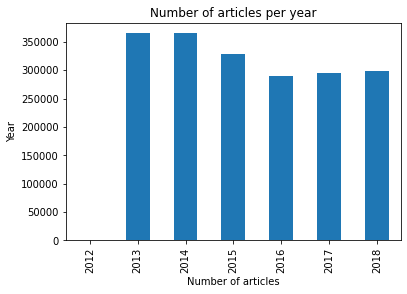

In [40]:
dna.groupby('year').an.agg('count').plot.bar()
plt.xlabel('Number of articles')
plt.ylabel('Year')
plt.title('Number of articles per year')

### Top 15 Companies mentioned

In [42]:
dna_unique_comp = dna[['company_codes', 'non_duplicates']]

In [44]:
company_codes = []
for codes in dna_unique_comp['company_codes'].str.split(","):
    for code in codes:
        company_codes.append(code)

In [45]:
company_freq = pd.DataFrame()
company_code = np.array([])
company_count = np.array([])

In [46]:
for company, count in Counter(my_list).items():
    company_code = np.append(company_code, company)
    company_count = np.append(company_count, count)


NameError: name 'my_list' is not defined

In [ ]:
company_freq['Code'] = company_code
company_freq['Count'] = company_count

In [ ]:
company_freq = company_freq.sort_values("Count", ascending = False).iloc[1:]

In [ ]:
company_freq.set_index("Code", inplace = True)

In [2]:
%matplotlib inline
company_freq.Count.head(15).plot(kind = 'bar')
plt.ylabel("Frequency")
plt.title("Top 15 Most Mentioned Companines")

NameError: name 'company_freq' is not defined

In [ ]:
#Made a csv of all companies with their frequency counts
company_freq.to_csv("../data/working/companyfrequency.csv")

In [ ]:
company_freq.reset_index(inplace = True)
# Made a csv of all companies with their frequency counts and 
# corresponding company names(invalid companies will have NaN)


In [ ]:
name = np.array([])
valid_companies = pd.read_csv("../data/working/validcompaniesdictionary.csv", index_col = [0])

In [ ]:
company_freq['Code'] = company_freq['Code'].str.upper()

In [ ]:
#Merging the valid company codes df with the company_freq df. This will match each company with their name, unless invalid
merged_dna_comp = pd.merge(valid_companies, company_freq, left_on = "Code", right_on = "Code", how = "outer")

In [ ]:
merged_dna_comp.to_csv("../data/working/companyfrequencyandname.csv")